# Support Vector Machines

SVM is a supervised learning model with associated learning algorithms that analyze data used for classification and regression analysis. SVM applies the statistics of support vectors, developed in the support vector machines algorithm, to categorize unlabeled data, and is one of the most widely used clustering algorithms in industrial applications.

The Project - We have a loan dataset with 14 variables. We try to predict whether the borrower will repay the loan or not by using SVM algorithm. 

In [1]:
loans <- read.csv('loan_data.csv')

In [41]:
summary(loans)

 credit.policy               purpose        int.rate       installment    
 0:1868        all_other         :2331   Min.   :0.0600   Min.   : 15.67  
 1:7710        credit_card       :1262   1st Qu.:0.1039   1st Qu.:163.77  
               debt_consolidation:3957   Median :0.1221   Median :268.95  
               educational       : 343   Mean   :0.1226   Mean   :319.09  
               home_improvement  : 629   3rd Qu.:0.1407   3rd Qu.:432.76  
               major_purchase    : 437   Max.   :0.2164   Max.   :940.14  
               small_business    : 619                                    
 log.annual.inc        dti              fico       days.with.cr.line
 Min.   : 7.548   Min.   : 0.000   Min.   :612.0   Min.   :  179    
 1st Qu.:10.558   1st Qu.: 7.213   1st Qu.:682.0   1st Qu.: 2820    
 Median :10.929   Median :12.665   Median :707.0   Median : 4140    
 Mean   :10.932   Mean   :12.607   Mean   :710.8   Mean   : 4561    
 3rd Qu.:11.291   3rd Qu.:17.950   3rd Qu.:737.0   3rd 

In [2]:
print(str(loans))

'data.frame':	9578 obs. of  14 variables:
 $ credit.policy    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ purpose          : Factor w/ 7 levels "all_other","credit_card",..: 3 2 3 3 2 2 3 1 5 3 ...
 $ int.rate         : num  0.119 0.107 0.136 0.101 0.143 ...
 $ installment      : num  829 228 367 162 103 ...
 $ log.annual.inc   : num  11.4 11.1 10.4 11.4 11.3 ...
 $ dti              : num  19.5 14.3 11.6 8.1 15 ...
 $ fico             : int  737 707 682 712 667 727 667 722 682 707 ...
 $ days.with.cr.line: num  5640 2760 4710 2700 4066 ...
 $ revol.bal        : int  28854 33623 3511 33667 4740 50807 3839 24220 69909 5630 ...
 $ revol.util       : num  52.1 76.7 25.6 73.2 39.5 51 76.8 68.6 51.1 23 ...
 $ inq.last.6mths   : int  0 0 1 1 0 0 0 0 1 1 ...
 $ delinq.2yrs      : int  0 0 0 0 1 0 0 0 0 0 ...
 $ pub.rec          : int  0 0 0 0 0 0 1 0 0 0 ...
 $ not.fully.paid   : int  0 0 0 0 0 0 1 1 0 0 ...
NULL


In [3]:
# Converting to categorical data 

loans$credit.policy <- factor(loans$credit.policy)
loans$inq.last.6mths <- factor(loans$inq.last.6mths)
loans$delinq.2yrs <- factor(loans$delinq.2yrs)
loans$pub.rec <- factor(loans$pub.rec)
loans$not.fully.paid <- factor(loans$not.fully.paid)

In [4]:
#EDA

library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


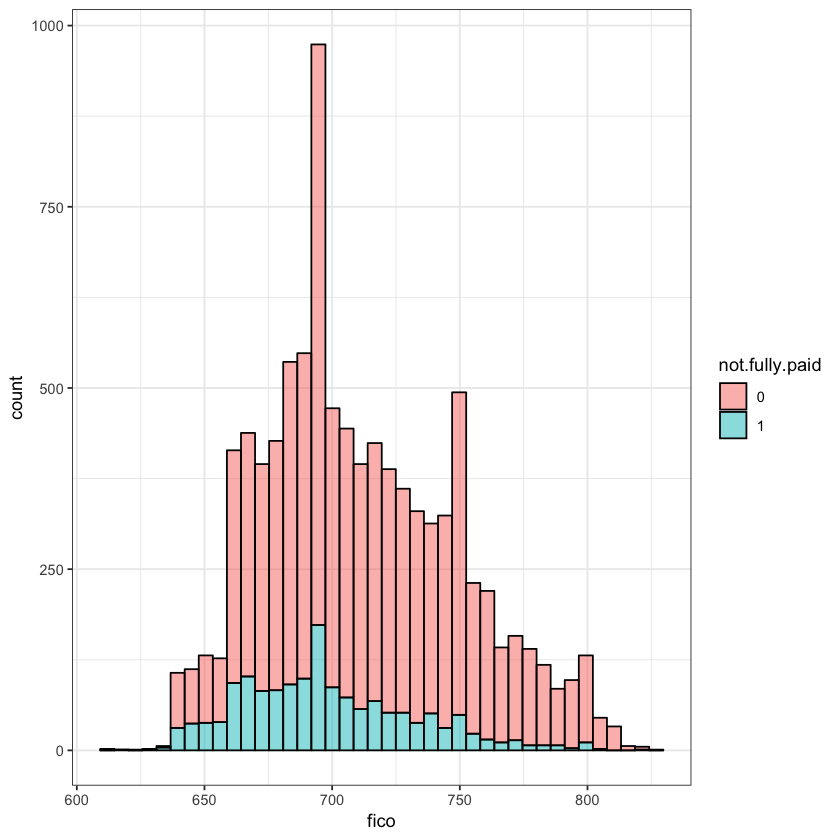

In [6]:
pl <-ggplot(loans,aes(fico))
pl <-pl + geom_histogram(aes(fill=not.fully.paid),color ='black',bins=40,alpha=0.5)
pl <- pl + theme_bw()
pl
pl <- scale_fill_manual(values = c('green', 'red'))


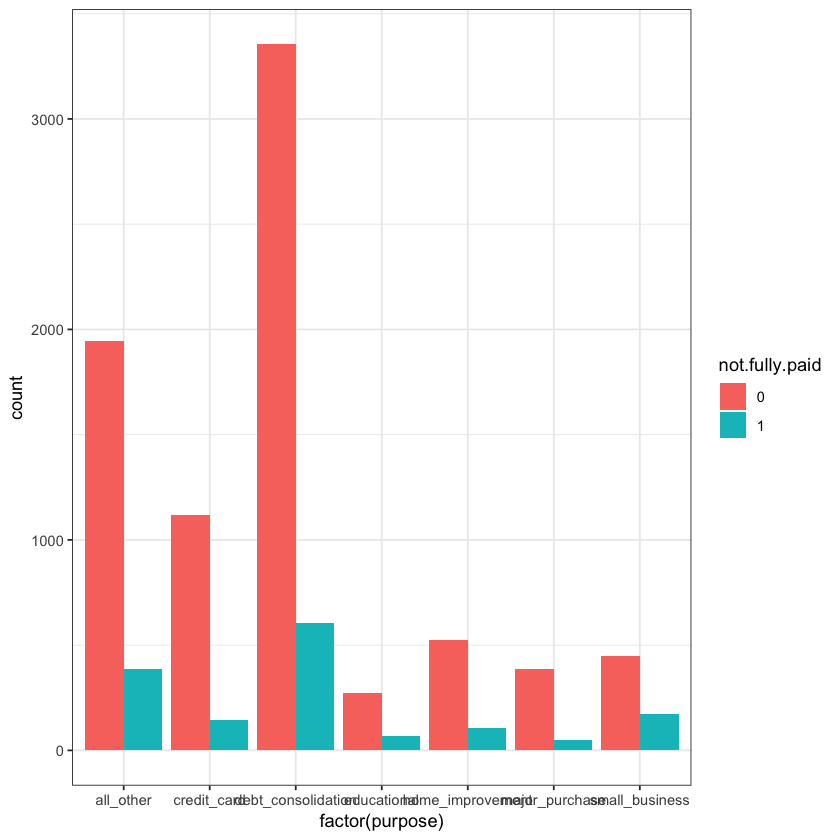

In [14]:
pl <-ggplot(loans,aes(x=factor(purpose)))
pl <-pl + geom_bar (aes(fill=not.fully.paid),position ='dodge')
pl <- pl + theme_bw()
pl
#pl <- scale_fill_manual(values = c('green', 'red'))

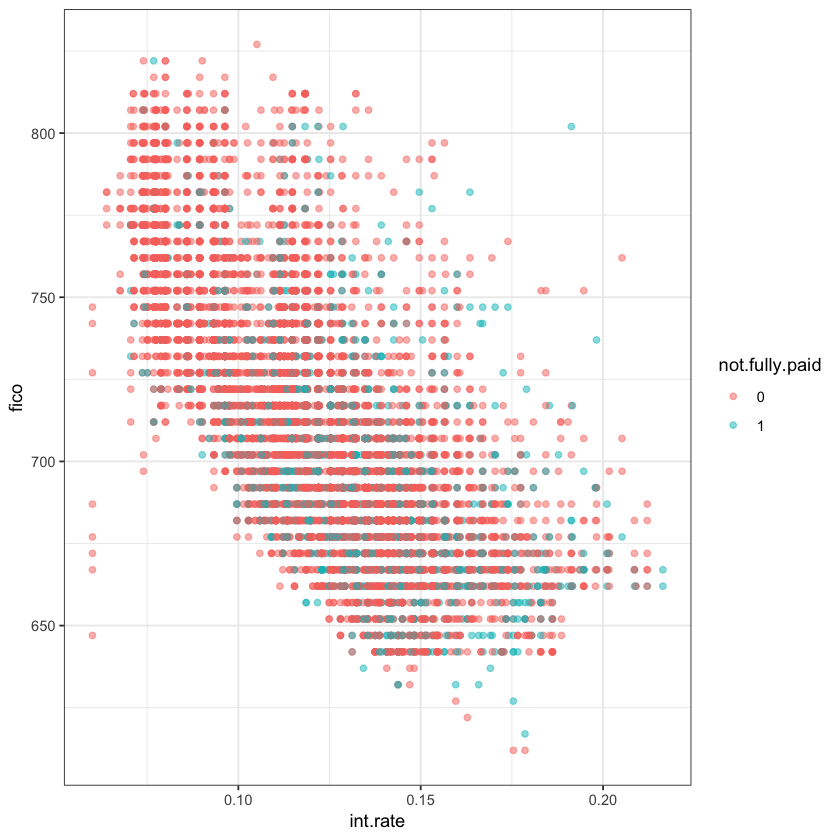

In [23]:
#pl <-ggplot(loans,aes(int.rate,fico)) + geom_point() + theme_bw()
pl <-ggplot(loans,aes(int.rate,fico)) + geom_point(aes(color=not.fully.paid),alpha=0.5)+theme_bw()
pl

In [25]:
#Splitting the data

library(caTools)
set.seed(101)

sample <- sample.split(loans$not.fully.paid,0.7)
train <- subset(loans,sample==T)
test <- subset(loans,sample==F)

In [26]:
library(e1071)

In [27]:
model <-svm(not.fully.paid ~., data=train)
print(summary(model))


Call:
svm(formula = not.fully.paid ~ ., data = train)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.01724138 

Number of Support Vectors:  2849

 ( 1776 1073 )


Number of Classes:  2 

Levels: 
 0 1





In [28]:
predicted.values <- predict(model,test[1:13])
table(predicted.values,test$not.fully.paid)

                
predicted.values    0    1
               0 2413  460
               1    0    0

**BAD RESULT**  - It means everone paid off their loans?
we need to tune the model to rectify it.

In [30]:
# Tuning the model
tuned.results <- tune(svm,train.x=not.fully.paid ~.,data=train,
                     kernel ='radial', ranges = list(cost=c(100,200),gamma=c(0.1)))
print(summary(tuned.results))


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
  100   0.1

- best performance: 0.2038837 

- Detailed performance results:
  cost gamma     error dispersion
1  100   0.1 0.2038837 0.01909525
2  200   0.1 0.2170058 0.01618188



In [31]:
tuned.model <-svm(not.fully.paid ~.,data = train,cost=100,gamma=0.1)

In [32]:
tuned.predictions <-predict(tuned.model,test[1:13])
table(tuned.predictions,test$not.fully.paid)

                 
tuned.predictions    0    1
                0 2179  358
                1  234  102

In [36]:
tuned.results <- tune(svm,train.x=not.fully.paid ~.,data=train,
                     kernel ='radial', ranges = list(cost=c(800,900),gamma=c(1.0)))
print(summary(tuned.results))


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
  800     1

- best performance: 0.181063 

- Detailed performance results:
  cost gamma    error dispersion
1  800     1 0.181063 0.01154664
2  900     1 0.181063 0.01154664



In [37]:
tuned.model <-svm(not.fully.paid ~.,data = train,cost=800,gamma=1.0)

In [38]:
tuned.predictions <-predict(tuned.model,test[1:13])
table(tuned.predictions,test$not.fully.paid)

                 
tuned.predictions    0    1
                0 2328  451
                1   85    9

 **- By tuning the model with higher cost and gamma values, the prediction rate becomes better, but the iteration time is long.**
 